In [17]:
import hashlib
from omnigibson.utils.asset_utils import get_all_object_categories
from omnigibson.systems import REGISTERED_SYSTEMS

In [18]:
categories = get_all_object_categories()
systems = sorted(REGISTERED_SYSTEMS)
all_semantics = sorted(set(categories + systems + ["agent"]))

In [19]:
hashes = {int(hashlib.md5(s.encode()).hexdigest(), 16): s for s in all_semantics}

In [20]:
print(hashes)

{285368742995167305871194683790358942809: 'acetone', 180435851693144136901188025502550923829: 'acetone_atomizer', 331160648892539523628389795233385755377: 'acid', 314907034144319883266509467601633978456: 'acorn', 181177897575572499099928655169506661226: 'address', 312536058971346412087733016418703640949: 'adhesive_material', 310452695727117586296240412421666805640: 'agave', 238237782739226620284157532706431391619: 'agent', 22545255283559120588602880032599515196: 'aioli', 339749274035892520521219738627087953983: 'air_conditioner', 257210979026788158174309254913961284028: 'air_filter', 34069237557829898873970201639551391834: 'air_freshener_atomizer', 127464305179192220771381199908713387519: 'alarm_clock', 306991865197287522317945352395593275448: 'alga', 169210287714317837395199284153938725613: 'allen_wrench', 140742121215830658414963484361209283426: 'allspice', 178959398509105254680354820930101322960: 'allspice_shaker', 166878611515166020754052526262994577908: 'almond', 13392542798729025

In [22]:
import numpy as np
import collections

def has_collisions(dtype):
  capped_hashes = [h % (2 ** dtype) for h in hashes.keys()]
  colliding = {k: v for k, v in collections.Counter(capped_hashes).items() if v > 1}
  return colliding

print("32 bit has collisions?", has_collisions(32))
print("24 bit has collisions?", has_collisions(24))
print("16 bit has collisions?", has_collisions(16))
print("8 bit has collisions?", has_collisions(8))


32 bit has collisions? {}
24 bit has collisions? {1057156: 2}
16 bit has collisions? {50042: 2, 63992: 2, 42949: 2, 35859: 2, 31520: 2, 20219: 3, 46129: 2, 5179: 2, 55326: 2, 58832: 2, 18833: 2, 9984: 2, 32150: 2, 52928: 2, 26185: 2, 1047: 2, 65531: 2, 39957: 2, 7154: 2, 29442: 2, 342: 3, 37092: 2, 18503: 2, 62978: 2, 8580: 2, 57358: 2, 27927: 2, 43801: 2, 63725: 2, 41248: 2, 21092: 2, 15539: 2, 51079: 2, 34619: 2, 34307: 2, 54563: 2, 962: 2, 61376: 2, 21808: 2, 9730: 2, 37195: 3, 57011: 2, 59786: 2, 15282: 2, 11262: 2, 19773: 2, 20717: 2}
8 bit has collisions? {89: 7, 53: 9, 241: 5, 88: 10, 106: 8, 117: 14, 136: 18, 131: 10, 60: 13, 63: 10, 188: 9, 90: 16, 255: 11, 56: 15, 237: 16, 98: 9, 208: 10, 244: 12, 202: 10, 122: 11, 142: 11, 85: 11, 243: 16, 209: 13, 78: 7, 235: 13, 91: 11, 176: 16, 127: 11, 95: 14, 168: 9, 4: 15, 182: 11, 231: 8, 68: 9, 100: 18, 111: 10, 7: 19, 9: 10, 246: 5, 229: 11, 211: 12, 239: 12, 187: 13, 61: 11, 16: 10, 45: 9, 14: 12, 47: 11, 10: 10, 207: 19, 238: 14, 

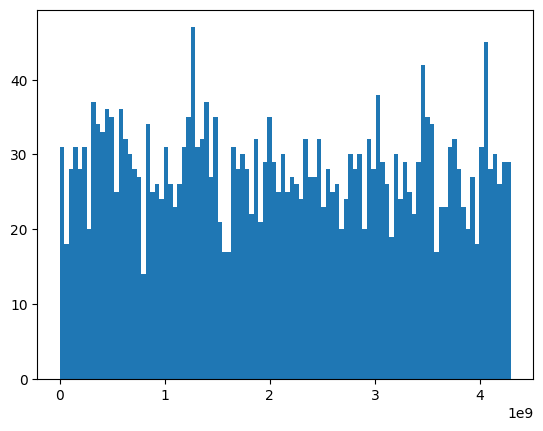

In [23]:
# How are the 32 bit hashes distributed?
import matplotlib.pyplot as plt
capped_hashes = [h % (2 ** 32) for h in hashes.keys()]

plt.hist(capped_hashes, bins=100)
plt.show()